In [2]:
import pandas as pd

df = pd.DataFrame({
    'team':['Germany','USA','France','Japan','Sweden','England','Brazil','Canada','Australia','Norway','Netherlands','Spain',
           'China','New Zealand','South Korea','Switzerland','Mexico','Colombia','Thailand','Nigeria','Ecuador','Ivory Coast','Cameroon','Costa Rica'],
    'group':['B','D','F','C','D','F','E','A','D','B','A','E','A','A','E','C','F','F','B','D','C','B','C','E'],
    'fifascore':[2168,2158,2103,2066,2008,2001,1984,1969,1968,1933,1919,1867,1847,1832,1830,1813,1748,1692,1651,1633,1485,1373,1455,1589],
    'ftescore':[95.6,95.4,92.4,92.7,91.6,89.6,92.2,90.1,88.7,88.7,86.2,84.7,85.2,82.5,84.3,83.7,81.1,78.0,68.0,85.7,63.3,75.6,79.3,72.8]
    })

df.groupby(['group', 'team']).mean()

fifascore  ftescore
group team                            
A     Canada            1969      90.1
      China             1847      85.2
      Netherlands       1919      86.2
      New Zealand       1832      82.5
B     Germany           2168      95.6
      Ivory Coast       1373      75.6
      Norway            1933      88.7
      Thailand          1651      68.0
C     Cameroon          1455      79.3
      Ecuador           1485      63.3
      Japan             2066      92.7
      Switzerland       1813      83.7
D     Australia         1968      88.7
      Nigeria           1633      85.7
      Sweden            2008      91.6
      USA               2158      95.4
E     Brazil            1984      92.2
      Costa Rica        1589      72.8
      South Korea       1830      84.3
      Spain             1867      84.7
F     Colombia          1692      78.0
      England           2001      89.6
      France            2103      92.4
      Mexico            1748      81.1

In [3]:
df.index = df.team
df.describe()
#using 220 as std for fifascore, 84 for ftescore

,fifascore,ftescore
count,24.000000,24.00000
mean,1837.166667,84.47500
std,220.425018,8.34627
min,1373.000000,63.30000
25%,1681.750000,80.65000
50%,1857.000000,85.45000
75%,1988.250000,90.47500
max,2168.000000,95.60000


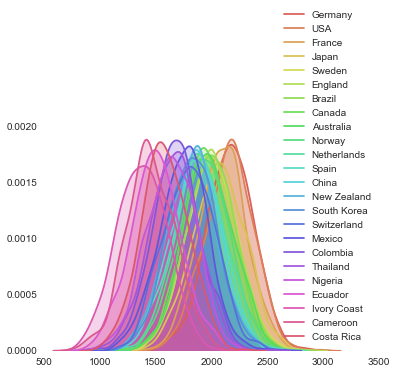

In [4]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pal = sns.color_palette('hls', len(df))

for i, c in zip(range(len(df)), pal):        
    normdist = stats.norm(df.fifascore[i], 220)
    sns.kdeplot(normdist.rvs(1000), shade=True, label=df.team[i], color=c)

In [ ]:
# import montecarlo

# fifa = montecarlo.mc('fifascore', 1)
# sims = [1,3,5,10,20,50,100]

# tlist=[]
# for i in sims:
#     fifa = montecarlo.mc('fifascore', i)
#     t = %timeit -o fifa.run_sim()
#     tlist.append(t)
                         
# best = [t.best for t in tlist]
# plt.plot(sims, best, kind='scatter')
# plt.xlabel('simulations')
# plt.ylabel('runtime');

In [4]:
# # Do not run this unless generating a new model
# import montecarlo

# fifa = montecarlo.mc('fifascore', 1000)
# fifa.run_sim()
# fte = montecarlo.mc('ftescore', 1000)
# fte.run_sim()

# fifadf = pd.concat(fifa.total_score, axis=1)
# ftedf = pd.concat(fte.total_score, axis=1)

# result = pd.concat([fifadf.mean(axis=1), ftedf.mean(axis=1)], axis=1)
# result.columns = ['fifascore', 'ftescore']

# fifadf.to_csv('fifadf.csv')
# ftedf.to_csv('ftedf.csv')

montecarlo.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  thirds['grouprk'] = rank_tb(thirds.score)


In [1]:
# pickle the simulation results if it exists, unpickle if it doesn't
import pickle

try:
    pickle.dump(fifa.resultlist, open('X:/Python Scripts/wwc2015/pickles/fifapickle.pkl', 'wb'))
    fifasim = fifa.resultlist
    print 'fifa results have been pickled.'
except:
    fifasim = pickle.load(open('X:/Python Scripts/wwc2015/pickles/fifapickle.pkl', 'rb'))
    fifadf = pd.read_csv('fifadf.csv', index_col='Unnamed: 0')
    print 'fifa results have been loaded.'
    
try:
    pickle.dump(fte.resultlist, open('X:/Python Scripts/wwc2015/pickles/ftepickle.pkl', 'wb'))
    ftesim = fte.resultlist
    print 'fte results have been pickled.'
except:
    ftesim = pickle.load(open('X:/Python Scripts/wwc2015/pickles/ftepickle.pkl', 'rb'))
    ftedf = pd.read_csv('ftedf.csv', index_col='Unnamed: 0')
    print 'fte results have been loaded.'

fifa results have been loaded.
fte results have been loaded.


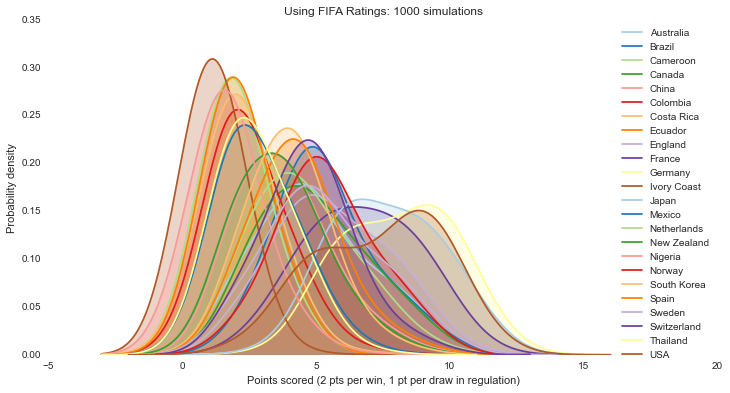

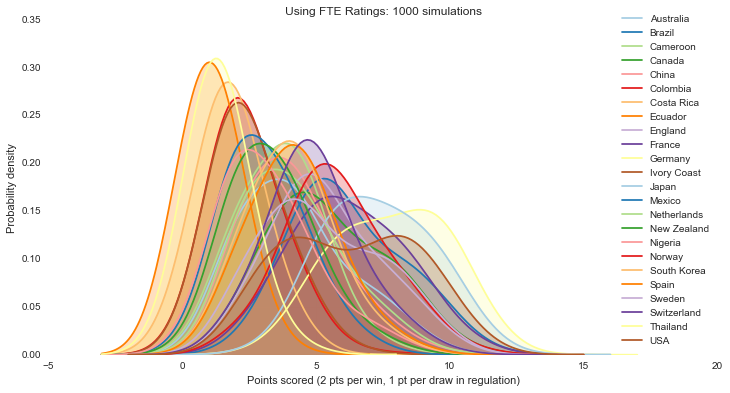

In [10]:
pal = sns.color_palette('Paired', n_colors=len(fifadf))

plt.figure(figsize=(12,6))
for i, c in zip(fifadf.T, pal):
    sns.kdeplot(fifadf.T[i], bw=1, label=i, color=c, shade=True)

plt.xlabel('Points scored (2 pts per win, 1 pt per draw in regulation)')
plt.ylabel('Probability density')
plt.title('Using FIFA Ratings: 1000 simulations')

plt.figure(figsize=(12,6))
for i, c in zip(ftedf.T, pal):
    sns.kdeplot(ftedf.T[i], bw=1, label=i, color=c, shade=True)    
    
plt.xlabel('Points scored (2 pts per win, 1 pt per draw in regulation)')
plt.ylabel('Probability density')
plt.title('Using FTE Ratings: 1000 simulations');
plt.savefig('plots/scoredist.png')

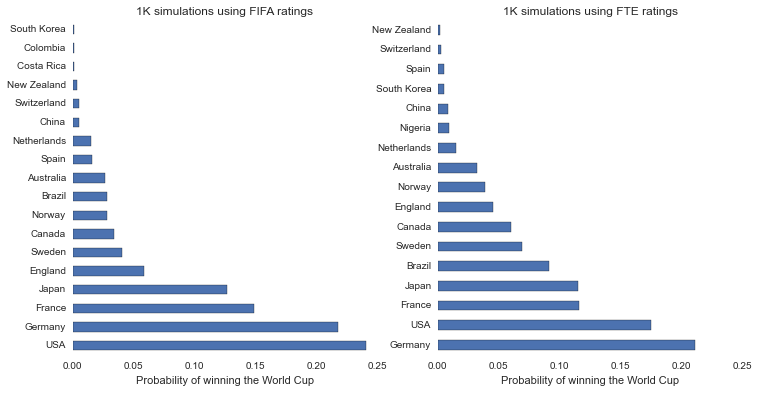

In [61]:
fifawinners = pd.Series([df.winner[52] for df in fifasim])
fifawinners = fifawinners.value_counts() / float(1000)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

fifawinners.plot(kind='barh', ax=ax1)
ax1.set_xlabel('Probability of winning the World Cup')
ax1.set_title('1K simulations using FIFA ratings')

ftewinners = pd.Series([df.winner[52] for df in ftesim])
ftewinners = ftewinners.value_counts() / float(1000)

ftewinners.plot(kind='barh', ax=ax2)
ax2.set_xlabel('Probability of winning the World Cup')
ax2.set_title('1K simulations using FTE ratings');

fig.savefig('plots/winners.png')

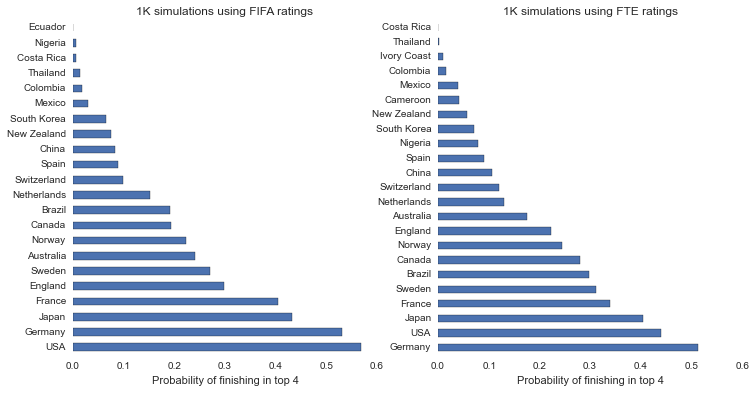

In [59]:
fifatop4 = pd.Series([i for df in fifasim for i in df.winner[44:48]])
fifatop4 = fifatop4.value_counts() / float(1000)

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121)
fifatop4.plot(kind='barh', ax=ax1)
ax1.set_xlabel('Probability of finishing in top 4')
ax1.set_title('1K simulations using FIFA ratings')

ftetop4 = pd.Series([i for df in ftesim for i in df.winner[44:48]])
ftetop4 = ftetop4.value_counts() / float(1000)

ax2 = fig.add_subplot(122)
ftetop4.plot(kind='barh', ax=ax2)
ax2.set_xlabel('Probability of finishing in top 4')
ax2.set_title('1K simulations using FTE ratings');

fig.savefig('plots/top4.png')

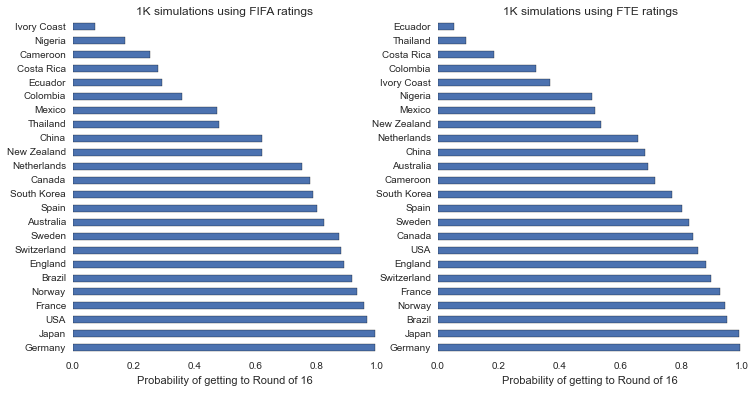

In [58]:
fifard16 = pd.Series([i for df in fifasim for i in df.team1[36:44]] + [i for df in fifasim for i in df.team2[36:44]]) 
fifard16 = fifard16.value_counts() / float(1000)

fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121)
fifard16.plot(kind='barh', ax=ax1)
ax1.set_xlabel('Probability of getting to Round of 16')
ax1.set_title('1K simulations using FIFA ratings')

fterd16 = pd.Series([i for df in ftesim for i in df.team1[36:44]] + [i for df in ftesim for i in df.team2[36:44]]) 
fterd16 = fterd16.value_counts() / float(1000)

ax2 = fig.add_subplot(122)
fterd16.plot(kind='barh', ax=ax2)
ax2.set_xlabel('Probability of getting to Round of 16')
ax2.set_title('1K simulations using FTE ratings');

fig.savefig('plots/round16.png')

In [35]:
# Individual matches
brakor1 = pd.Series([df.score1[25] for df in fifasim])
brakor2 = pd.Series([df.score1[25] for df in ftesim])

print brakor1.value_counts() / 1000
print brakor2.value_counts() / 1000

1    0.815
2    0.155
0    0.030
dtype: float64
1    0.768
2    0.220
0    0.012
dtype: float64
